<a href="https://colab.research.google.com/github/ProdKEYMON/Data_keymon/blob/main/Chapter5_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks/Class 101/ML

/content/drive/MyDrive/Colab Notebooks/Class 101/ML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class 101/datas/Data02.csv', encoding = 'cp949')

,Unnamed: 0,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,51299,66579515,NaN,Promotion,R관리방판,2020-02-03,60,무통장,K3,96900,계약확정,0,없음,NaN,롯데카드,정상,NaN,NaN
51300,51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0
51301,51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0
51302,51302,66792778,NaN,Normal,렌탈총판,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,신한카드,정상,64.0,2588.0


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class 101/datas/Data02.csv', encoding = 'cp949')

In [5]:
df1.columns

Index(['Unnamed: 0', 'id', 'type_of_contract', 'type_of_contract2', 'channel',
       'datetime', 'Term', 'payment_type', 'product', 'amount', 'state',
       'overdue_count', 'overdue', 'credit rating', 'bank', 'cancellation',
       'age', 'Mileage'],
      dtype='object')

In [6]:
cond1 = df1['cancellation'].isnull()

In [7]:
df1_clean = df1[~cond1]

In [8]:
df1_clean['cancellation'].isnull().sum()

0

In [9]:
X = df1_clean[['type_of_contract', 'Term', 'product', 'amount', 'credit rating', 'age']]
Y = df1_clean['cancellation'].replace({'정상':0, '해약':1})

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1234)

In [12]:
numeric_pipe = make_pipeline(SimpleImputer(strategy = 'mean'), MinMaxScaler())
categorical_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(handle_unknown= 'ignore'))

In [13]:
numeric_list = ['Term', 'amount', 'credit rating', 'age']
categorical_list = ['type_of_contract', 'product']

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list), (categorical_pipe, categorical_list))

In [38]:
model_pipe = make_pipeline(preprocessing_pipe, RandomForestClassifier())

In [39]:
hyperparameter = {'randomforestclassifier__max_depth': range(5,10),
                  'randomforestclassifier__min_samples_split': range(5,10),
                  'randomforestclassifier__n_estimators': [50,100,150],
                  'randomforestclassifier__class_weight':['balanced']}

grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter, cv = 5, scoring = 'f1', n_jobs = -1)
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'amount',
                                                                          'credit '
                                                                          'rating',
                                                                          'age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEn...own='ignore'))]),
                                                                         ['type_of_contract',
                                                                          'product'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__class_weight': ['balanced'],
                         'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__min_samples_split': range(5, 10),
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]},
             scoring='f1')

In [40]:
best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [41]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     37775
           1       0.13      0.61      0.21       684

    accuracy                           0.92     38459
   macro avg       0.56      0.77      0.58     38459
weighted avg       0.98      0.92      0.94     38459



In [42]:
from sklearn.metrics import precision_recall_curve

In [43]:
best_model.predict_proba(X_test)

array([[0.78705639, 0.21294361],
       [0.81748478, 0.18251522],
       [0.58875515, 0.41124485],
       ...,
       [0.64064264, 0.35935736],
       [0.76131977, 0.23868023],
       [0.39056436, 0.60943564]])

In [44]:
Y_test_proba = best_model.predict_proba(X_test)[:, 1]

In [45]:
precision, recall, threshold = precision_recall_curve(Y_test, Y_test_proba)

In [46]:
import matplotlib.pyplot as plt

In [47]:
threshold.shape

(3898,)

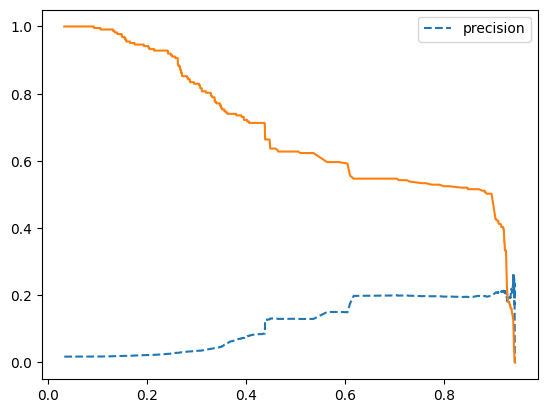

In [48]:
plt.plot(threshold, precision[0:3898], linestyle = '--', label ='precision')
plt.plot(threshold, recall[0:3898])
plt.legend()

In [49]:
from sklearn.preprocessing import Binarizer

In [54]:
threshold_value = 0.87

In [60]:
Binarizer(threshold = threshold_value)
predict_proba_col =best_model.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [61]:
custom_binarizer = Binarizer(threshold = threshold_value).fit(predict_proba_col)
Y_test_proba = custom_binarizer.transform(predict_proba_col)

In [62]:
print(classification_report(Y_test, Y_test_proba))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     12597
           1       0.20      0.51      0.28       223

    accuracy                           0.96     12820
   macro avg       0.59      0.74      0.63     12820
weighted avg       0.98      0.96      0.96     12820

